In [2]:
from models.ESN.esn_model import ESNModel
import os
import pandas as pd

ROOT_PATH = os.path.pardir
SUNSPOTS_PATH = os.path.join(ROOT_PATH, "datasets/Sunspots.csv")
MACKEY_GLASS_PATH = os.path.join(ROOT_PATH, "datasets/MackeyGlass.csv")
ELECTRICITY_PATH = os.path.join(ROOT_PATH, "datasets/Electricity.csv")

c:\Users\piotr\Workspaces\timeseries-models\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
MyESN = ESNModel(
    dataset=pd.read_csv(MACKEY_GLASS_PATH,index_col=0),
    n_steps_in=20,
    n_steps_out=5,
    test_frac=0.1,
    metric=None,
)

Target column: 'Total'


IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
params = MyESN.tune()


[I 2023-05-22 11:59:09,796] A new study created in memory with name: no-name-0b007178-cea6-4d88-b9c0-dc1fd99705d6
[I 2023-05-22 11:59:10,422] Trial 0 finished with value: 9.7611631929815 and parameters: {'density': 0.1605130941391416, 'spectral_radius': 1.2062772131928878, 'noise_magnitude': 0.07751492912335155, 'hidden_size': 947}. Best is trial 0 with value: 9.7611631929815.
[I 2023-05-22 11:59:11,002] Trial 1 finished with value: 12.543703302857622 and parameters: {'density': 0.009005847972847758, 'spectral_radius': 0.893993608913065, 'noise_magnitude': 0.04921093369395351, 'hidden_size': 827}. Best is trial 0 with value: 9.7611631929815.
[I 2023-05-22 11:59:11,528] Trial 2 finished with value: 9.366653702532894 and parameters: {'density': 0.5256741418585102, 'spectral_radius': 0.5439754047449764, 'noise_magnitude': 0.08784489045457813, 'hidden_size': 796}. Best is trial 2 with value: 9.366653702532894.
[I 2023-05-22 11:59:11,805] Trial 3 finished with value: 8.634146511858656 and p

In [4]:
MyESN.fit(*params)


71


In [5]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyESN.predict(-1, autoreggressive=True)



In [6]:
# Windowed forecast with shift, 25 ahead
forecast = MyESN.predict(10, autoreggressive=False, shift=0)

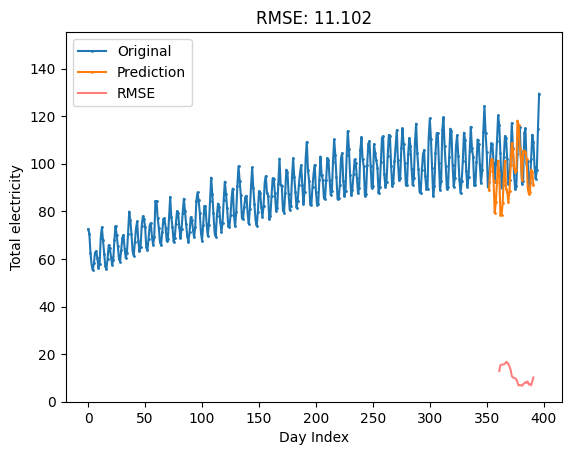

In [7]:
# Autoregressive forecast
MyESN.plotter.plot_forecast(forecast_autoregressive, linestyle='-')

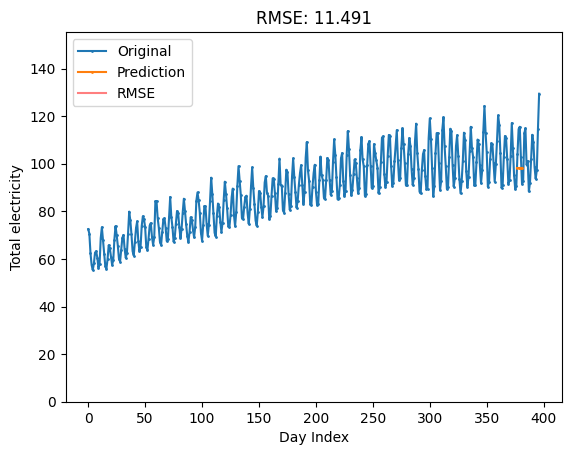

In [8]:
# Windowed forecast
MyESN.plotter.plot_forecast(forecast, linestyle='-')

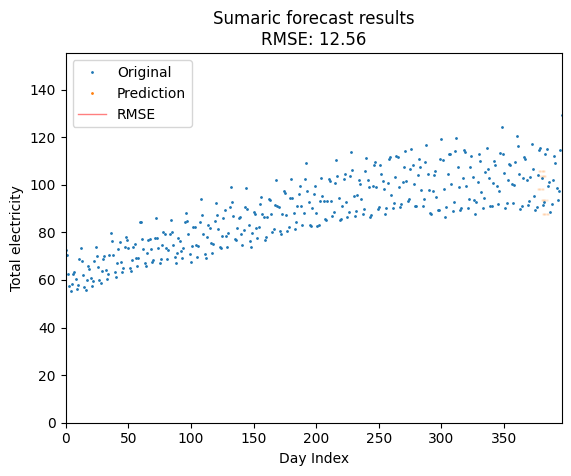

In [10]:
# Cumulative plot for windowed forecast
MyESN.plotter.plot_forecasts(MyESN.forecasts, linestyle='')

In [11]:
MyESN_20_1 = ESNModel(
    dataset=pd.read_csv(ELECTRICITY_PATH),
    n_steps_in=20,
    n_steps_out=1,
    test_frac=0.1,
    xlabel="Day Index",
    ylabel="Total electricity",
    metric=None,
)

Target column: 'IPG2211A2N'


In [12]:
params = MyESN_20_1.tune()

[I 2023-05-22 12:00:33,680] A new study created in memory with name: no-name-43e4f39d-4bb5-4078-8f25-e0a7a2318a99
[I 2023-05-22 12:00:33,872] Trial 0 finished with value: 7.527113825004839 and parameters: {'density': 0.16402539213072276, 'spectral_radius': 1.2987959833686655, 'noise_magnitude': 0.053940799940276785, 'hidden_size': 298}. Best is trial 0 with value: 7.527113825004839.
[I 2023-05-22 12:00:34,025] Trial 1 finished with value: 6.402413425847452 and parameters: {'density': 0.8393855622466131, 'spectral_radius': 0.8915737593990063, 'noise_magnitude': 0.04869179337044756, 'hidden_size': 81}. Best is trial 1 with value: 6.402413425847452.
[I 2023-05-22 12:00:34,231] Trial 2 finished with value: 7.085515365066377 and parameters: {'density': 0.6406075217503668, 'spectral_radius': 1.4219271816301982, 'noise_magnitude': 0.06372364024536625, 'hidden_size': 222}. Best is trial 1 with value: 6.402413425847452.
[I 2023-05-22 12:00:34,644] Trial 3 finished with value: 8.038513305105353 

In [13]:
MyESN_20_1.fit(*params)

53


In [14]:
forecast_autoregressive = MyESN_20_1.predict(-1, autoreggressive=True)

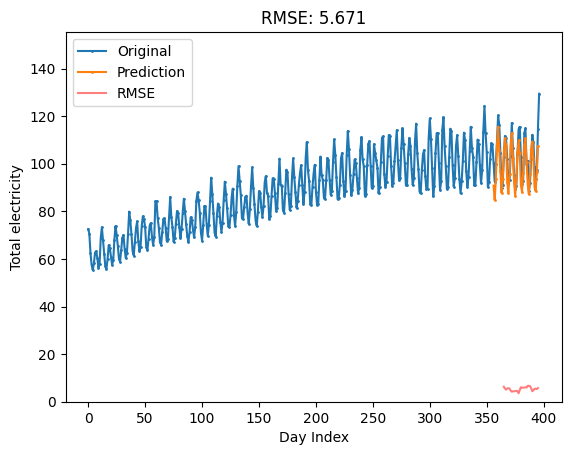

In [16]:
MyESN_20_1.plotter.plot_forecast(forecast_autoregressive, linestyle='-')